# Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for user-defined corridors

<h2>Table of Contents<span class="tocSkip"></span></h2>
<div class="toc"><ul class="toc-item"><li><span><a href="#Authors" data-toc-modified-id="Authors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Authors</a></span></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Funding" data-toc-modified-id="Funding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Funding</a></span></li><li><span><a href="#Keywords" data-toc-modified-id="Keywords-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Keywords</a></span></li><li><span><a href="#Citation" data-toc-modified-id="Citation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Citation</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item">
<li><span><a href="#Installation-Options" data-toc-modified-id="Installation-Options-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Installation Options</a></span><ul class="toc-item"><li><span><a href="#Option-1:-Install-and-run-on-Google-Colaboratory" data-toc-modified-id="Option-1:-Install-and-run-on-Google-Colaboratory-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Option 1: Install and run on Google Colaboratory</a></span></li><li><span><a href="#Option-2:-Install-and-run-on-local-file-system" data-toc-modified-id="Option-2:-Install-and-run-on-local-file-system-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Option 2: Install and run on local file system</a></span></ul></li><li><span><a href="#Library-Imports" data-toc-modified-id="Library-Imports-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Library Imports</a></span></li><li><span><a href="#Define-Functions" data-toc-modified-id="Define-Functions-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Define Functions</a></span></ul></li><li><span><a href="#Data-Access-and-Processing" data-toc-modified-id="Data-Access-and-Processing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Access and Processing</a></span><ul class="toc-item"><li><span><a href="#Get-3DEP-Dataset-Boundary-Polygons" data-toc-modified-id="Get-3DEP-Dataset-Boundary-Polygons-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Get 3DEP Dataset Boundary Polygons</a></span></li><li><span><a href="#Create-Interactive-Ipyleaflet-Map-And-Define-Corridor" data-toc-modified-id="Create-Interactive-Ipyleaflet-Map-And-Define-Corridor-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Create Interactive Ipyleaflet Map and Define Corridor</a></span></li>
<li><span><a href="#Buffer-User-Defined-Corridor" data-toc-modified-id="Buffer-User-Defined-Corridor-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Buffer User-Defined Corridor</a></span></li><li><span><a href="#Find-3DEP-Polygon(s)-Intersecting-AOI" data-toc-modified-id="Find-3DEP-Polygon(s)-Intersecting-AOI-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Find 3DEP Polygon(s) Intersecting AOI</a></span></li><li><span><a href="#Specify-Point-Cloud-Resolution" data-toc-modified-id="Specify-Point-Cloud-Resolution-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Specify Point Cloud Resolution</a></span></li><li><span><a href="#Construct-and-Exectute-PDAL-Pipeline-for-Point-Cloud-Data" data-toc-modified-id="Construct-and-Exectute-PDAL-Pipeline-for-Point-Cloud-Data-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Construct and Exectute PDAL Pipeline for Point Cloud Data</a></span></li><li><span><a href="#Digital-Elevation-Model-(DEM)-Generation" data-toc-modified-id="Digital-Elevation-Model-(DEM)-Generation-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Digital Elevation Model (DEM) Generation</a></span></li><ul class="toc-item"><li><span><a href="#Make-Digital-Surface-Model-(DSM)" data-toc-modified-id="Make-Digital-Surface-Model-(DSM)-7.7.1"><span class="toc-item-num">7.7.1&nbsp;&nbsp;</span>Make Digital Surface Model (DSM)</a></span></li><li><span><a href="#Make-Digital-Terrain-Model-(DTM)" data-toc-modified-id="Make-Digital-Terrain-Model-(DTM)-7.7.2"><span class="toc-item-num">7.7.2&nbsp;&nbsp;</span>Make Digital Terrain Model (DTM)</a></span></ul></ul></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Visualize-DEMs-(DSM/DTM)" data-toc-modified-id="Visualize-DEMs-(DSM/DTM)-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Visualize DEMs (DSM/DTM)</a></span></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Resources</a></span></li>

## Authors

-  Author1 = {"name": "Cole Speed", "affiliation": "UNAVCO, Inc.", "email": "cole.speed@beg.utexas.edu", "orcid": "https://orcid.org/0000-0003-0166-3642"}
-  Author2 = {"name": "Matthew Beckley", "affiliation": "UNAVCO, Inc.", "email": "beckley@unavco.org", "orcid":""}
-  Author3 = {"name": "Christopher Crosby", "affiliation": "UNAVCO, Inc.", "email": "crosby@unavco.org", "orcid": "https://orcid.org/0000-0003-2522-4193"}
-  Author4 = {"name": "Viswanath Nandigam", "affiliation": "San Diego Supercomputer Center, UC San Diego", "email": "viswanat@sdsc.edu", "orcid": "https://orcid.org/0000-0003-0928-9851"}
    
## Purpose

The United States Geological Survey's 3-D Elevation Program (3DEP) is collecting high-quality light detection and ranging (lidar) data over the conterminous U.S., Hawaii, and the U.S territories. Data acquisition is ongoing, with over 1800 3DEP datasets consisting of more than 42 trillion points covering an area of greater than 6.5 million $km^{2}$ already available for use. Data are hosted and publically available in Entwine Point Tile (EPT) format in an<a href="https://registry.opendata.aws/usgs-lidar/"> Amazon Web Services (AWS) S3 public bucket</a>.

3DEP point cloud data can be accessed through several user interfaces including the <a href="https://portal.opentopography.org/datasets">OpenTopography Data Portal</a> and the <a href="https://prd-tnm.s3.amazonaws.com/LidarExplorer/index.html#/process">USGS Lidar Explorer</a>. In many cases, however, users may prefer to access and produce derivative products from the 3DEP lidar data programmatically, particularly in the case of more advanced users seeking to access and process immense swaths of lidar point cloud data on local, commercial cloud, or high performance compute infrastructure. However, to date tools and/or workflows for programmatic access and processing of the 3DEP data remain underdeveloped.

This Jupyter Notebook is part of a suite developed by OpenTopography in collaboration with the USGS National Geospatial Program, in an effort to leverage available APIs and cloud resources to enhance access and usability of 3DEP data and products for the geospatial community. Importantly, these notebooks are designed to be accessible by user's with limited experience in the Python programming language and as educational tools for those looking to learn about accessing, processing, and visualizing cloud-hosted data with Python. These notebooks use open-source Python libraries, including the Point Data Abstraction Libary (PDAL) and Geospatial Data Abstraction Library (GDAL) for all point cloud and raster processing. 

This and the other use-case specific Jupyter Notebooks developed as part of this effort for programmatic 3DEP access are available in a <a href="https://github.com/cmspeed/OT_3DEP_Workflows"> Github repository </a> and may be run locally or on the <a href="https://colab.research.google.com/">Google Colaboratory</a> cloud platform.

#### Specific features of this notebook

1. Users may (1)  define the linear corridor(s) of interest directly in an interactive map within this notebook or (2) import a shapefile defining the corridor(s).

2. User specifies a buffer distance (in meters) from the linear corridor feature(s).

3. API request to <a href="https://registry.opendata.aws/usgs-lidar/"> Amazon Web Services (AWS) EPT (Entwine Point Tile) S3 bucket</a> returns 3DEP point cloud data within buffered corridor boundary. 

4. Flexible and customizable PDAL pipelines are available for specifying point cloud resolution, filtering, reclassifying, and reprojecting points.

5. Option to create a Digital Terrain Model (DTM) or Digital Surface Model (DSM) with user-specifed resolution, gridding method, and file type.

6. Point cloud data and/or derivative products are saved to local directory or on Google Drive (if user uses Google Colaboratory option, see below.)

## Funding

Funding for the creation and distribution of these Jupyter Notebook-based workflows was provided as by the <a href="https://www.usgs.gov/centers/community-for-data-integration-cdi">USGS Community for Data Integration (CDI)</a> through the funded grant <a href="https://www.usgs.gov/centers/community-for-data-integration-cdi/science/enhancing-usability-3dep-data-and-web-services"> *Enhancing usability of 3DEP data and web services with Jupyter notebooks*</a>. OpenTopography is supported by the National Science Foundation (NSF) under Award Numbers <a href="https://nsf.gov/awardsearch/showAward?AWD_ID=1948997">1948997</a>, <a href="https://nsf.gov/awardsearch/showAward?AWD_ID=1948994">1948994</a> & <a href ="https://nsf.gov/awardsearch/showAward?AWD_ID=1948857">1948857</a>.

## Keywords

keywords=["OpenTopography","USGS", "CDI", "3DEP", "PDAL", "Corridors"]

## Citation

To cite this notebook:  Speed, C., Beckley, M., Crosby, C., & Nandigam, V. (2022). Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for user-defined corridors (Version v1.0). DOI: Accessed: MM/DD/YYYY

## Setup

### Installation Options
There are two options for performing the workflow steps outlined below. **Option 1** is our suggested method for simplicity, as building a virtual environment with the required dependencies on the user's local file system can be challenging based on the user's experience level with Python and <a href="https://www.anaconda.com/"> Anaconda</a>.

1. **Option 1**: Launch the interactive Jupyter notebook on Google Colaboratory.
    - Does not require creation of a virtual environment or installation on local file system.
    - Requires Google account and access to personal Google Drive folder.
    - Data download limits will be dependent on user's available Google Drive storage. 
    - If you wish to run this notebook in Google Colaboratory click the 'Open in Colab' badge below. 
    <br/><br/>
2. **Option 2**: Download this Jupyter notebook (.ipynb file) to your local file system.
    - Create a virtual conda environment containing the required dependencies.
    - Run Juypter notebook on local machine.
    - Data download limits and computation speed will be dependent on user's hardware.

### Option 1: Install and run on Google Colaboratory
For ease-of-use, it is suggested to launch and execute these notebooks on <a href="https://colab.research.google.com/">Google Colaboratory</a> (Colab, for short), Google's Cloud Platform. Dependencies will be installed on a virtual machine on Google's cloud servers and the code will be executed directly in your browser! A major benefit of this is that you will have direct access to Google's high-end CPU/GPUs and will not have to install any dependencies locally. All deliverables will be saved to your personal Google Drive. To experiment and run one of the below Jupyter Notebooks on Google Colab click the "Open in Colab" badge below.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/04_3DEP_Generate_DEM_Corridors.ipynb)

In [ ]:
### Exectute this block of cells if running on Google Colab
!git clone https://github.com/cmspeed/OT_3DEP_Workflows

In [ ]:
# Installs Conda, which is the easiest way to install PDAL in the Google Colab environment
# This will trigger a notification that the "Your session crashed for an unknown reason." 
# This is normal. Execute next cell.
!pip install -q condacolab
import condacolab
condacolab.install()

In [ ]:
# Import Conda and install PDAL ---- Takes 1-2 minutes
import condacolab
condacolab.check()
!mamba install -q python-pdal

In [ ]:
#  Install the remaining dependencies
!pip install -r OT_3DEP_Workflows/requirements.txt

**Runtime must be restarted before import of PDAL will be successful!**

- On Google Colab ribbon click "Runtime" > "Restart Runtime".
- Do not execute any of the previous cells. Execute the following cells only.

The `PROJ` library requires an environment variable, named `PROJ_LIB`, which defines its location for all other modules. When this is run in a conda environement, this is set automatically. However, in Colab this needs to be set manually, which we do in the next cell.

In [ ]:
import os
os.environ['PROJ_LIB'] = '/usr/local/share/proj/'

Next, mount your Google Drive. This allows you to read and write files to your Google Drive.

In [ ]:
# Mount your Google Drive for saving content
from google.colab import drive
drive.mount('/content/drive')

**If using Option 1 (Google Colab), proceed to Library Imports**

### Option 2: Install and run on local file system

If you would like to run the Jupyter Notebook on your local machine:

Make a new directory on your local file system where the 3DEP Jupyter Notebooks (and all 3DEP data, if desired) will be saved. In this example case, the directory will be called `3DEP`.
  
    $ mkdir 3DEP

Change into the new directory and `git clone` the Github repository containing the Jupyter Notebooks and other relevant files to your local file system.

    $ cd 3DEP
$ git clone https://github.com/cmspeed/OT_3DEP_Workflows

Anaconda is recommended for Python package installation and management. Package versions in Anaconda are managed by the package management system *conda*. Anaconda installers for MacOS/Linux/Windows can be downloaded from https://docs.anaconda.com/anaconda/install/. Follow the instructions to install Anaconda.

After installing Anaconda, create a virtual environment with the required dependencies, using the `environment.yml` file contained in the cloned Github repo). Note: Exectuting the following command will automatically create the conda environment with name `3dep` and all of the required dependencies installed. If you would prefer a different name, replace `3dep` with another name in the following command:

	$ conda env create -n 3dep --file environment.yml

Next, activate the conda environment with all of the necessary dependencies installed. 
	
	$ conda activate 3dep
    
To use the Ipython kernel in this newly created conda environement, it will need to be installed manually.

After activating the newly created environment (in this case called '3dep'), install the IPython kernel for Jupyter:

    $ pip install --user ipykernel
    
Next, add the virtual environement you just created to Jupyter (assuming that the conda environement is called '3dep'. If not replace '3dep' with the name of your newly created environement in the command below:

    $ python -m ipykernel install --user --name=3dep

Now, launch the chosen Jupyter Notebook. If unsure how to launch a Notebook, refer to this guide (https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html). 

Once you are viewing the notebook, on the upper toolbar click "Kernel" > "Change Kernel" > "3dep" (or the name of your newly created conda environment.

**You may now proceed to Library Imports**

### Library Imports

After successfully completing the steps outlined in either **Option 1** or **Option 2**, we can now import the modules for use throughout the rest of the notebook.

In [2]:
#Import Modules
import copy
import geopandas as gpd
import ipyleaflet
import ipywidgets as widgets
import json
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from osgeo import gdal
import pdal
import pyproj
import requests
from shapely.geometry import shape, Point, Polygon
from shapely.ops import transform

### Define Functions

Several functions are provided in the cell below. These functions are necessary for successful execution of remainder of the notebook. Broadly, these functions provide the utility for the user to draw and area of interest (AOI) on an interactive map and construct the PDAL pipeline for getting the point cloud data from the Amazon Web Services EPT bucket, performing processing steps, producing DEMs, and saving the results. A description of the parameters are provided as docstrings in the function definitions.

**These functions can be modified as the user sees fit; however, they are designed to work with a simple execution of the below cell.**

In [3]:
def proj_to_3857(poly, orig_crs):
    """
    Function for reprojecting a polygon from a shapefile of any CRS to Web Mercator (EPSG: 3857).
    The original polygon must have a CRS assigned.
    
    :param poly: shapely polygon for user area of interest (AOI)
    :param orig_crs: the original CRS for the shapefile. It is stripped out during import_shapefile_to_shapely() method
    """
    wgs84 = pyproj.CRS("EPSG:4326")
    web_mercator = pyproj.CRS("EPSG:3857")
    project_gcs = pyproj.Transformer.from_crs(orig_crs, wgs84, always_xy=True).transform
    project_wm = pyproj.Transformer.from_crs(orig_crs, web_mercator, always_xy=True).transform
    user_poly_proj4326 = transform(project_gcs, poly)
    user_poly_proj3857 = transform(project_wm, poly)
    return(user_poly_proj4326, user_poly_proj3857)

def gcs_to_proj(poly):
    """
    Function for reprojecting polygon shapely object from geographic coordinates (EPSG:4326) 
    to Web Mercator (EPSG: 3857)). 
    
    :param poly: shapely polygon for user area of interest (AOI)
    """
    wgs84 = pyproj.CRS("EPSG:4326")
    web_mercator = pyproj.CRS("EPSG:3857")
    project = pyproj.Transformer.from_crs(wgs84, web_mercator, always_xy=True).transform
    user_poly_proj3857 = transform(project, poly)
    return(user_poly_proj3857)

def import_shapefile_to_shapely(path):
    """
    Conversion of shapefile to shapely object.
    
    :param path: location of shapefile on user's local file system
    """
    shapefile_path = path
    gdf = gpd.read_file(shapefile_path)
    orig_crs = gdf.crs                   # this is the original CRS of the imported shapefile
    user_shp = gdf.loc[0, 'geometry']
    user_shp_epsg4326, user_shp_epsg3857 = proj_to_3857(user_shp, orig_crs)
    user_AOI = [[user_shp_epsg4326, user_shp_epsg3857]]
    return user_AOI
    
def handle_draw(target, action, geo_json):
    """
    Functionality to draw area of interest (AOI) on interactive ipyleaflet map.
    
    :param extent_epsg3857: polygon for user-defined AOI
    :param usgs_3dep_dataset_name: name of 3DEP dataset which AOI overlaps
    :param resolution: The desired resolution of the pointcloud based on the following definition:
    """
        
    geom = dict(geo_json['geometry'])
    user_poly = shape(geom)
    user_poly_proj3857 = gcs_to_proj(user_poly)
    print('AOI is valid and has boundaries of ', user_poly_proj3857.bounds, 'Please proceed to the next cell.')
    user_AOI.append((user_poly, user_poly_proj3857))  #for various reasons, we need user AOI in GCS and EPSG 3857
    

def build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_names, pc_resolution, filterNoise = False,
                        reclassify = False, savePointCloud = True, outCRS = 3857, pc_outName = 'filter_test', 
                        pc_outType = 'laz'):

    """
    Build pdal pipeline for requesting, processing, and saving point cloud data. Each processing step is a 'stage' 
    in the final pdal pipeline. Each stages is appended to the 'pointcloud_pipeline' object to produce the final pipeline.
    
    Parameters:
    :param extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857)Polygon is generated 
                            either through the 'handle_draw' methor or by inputing their own shapefile.
    :param usgs_3dep_dataset_names: List of name of the 3DEP dataset(s) that the data will be obtained. This parameter is set 
                                determined through intersecttino of the 3DEP and AOI polys.
    :param pc_resolution: The desired resolution of the pointcloud based on the following definition:
        
                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.
                            
    :param filterNoise: Option to remove points from USGS Class 7 (Low Noise) and Class 18 (High Noise).
    :param savePointCloud: Option to save (or not) the point cloud data. If savePointCloud == False, 
           the pc_outName and pc_outType parameters are not used and can be any value.
    :param outCRS: Output coordinate reference systemt (CRS), specified by ESPG code (e.g., 3857 - Web Mercator)
    :param pc_outName: Desired name of file on user's local file system. If savePointcloud = False, 
                  pc_outName can be in value.
    :param pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If savePointcloud = False, 
                  pc_outName can be in value. If a different file type is requested,the user will get error.
    :raise Exception: If user passes in argument that is not 'las' or 'laz'.
    """
    
    #this is the basic pipeline which only accesses the 3DEP data
    readers = []
    for name in usgs_3dep_dataset_names:
        url = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public/{}/ept.json".format(name)
        reader = {
            "type": "readers.ept",
            "filename": str(url),
            "polygon": str(extent_epsg3857),
            "requests": 3,
            "resolution": pc_resolution
        }
        readers.append(reader)
        
    pointcloud_pipeline = {
            "pipeline":
                readers
    }
    
    if filterNoise == True:
        
        filter_stage = {
            "type":"filters.range",
            "limits":"Classification![7:7], Classification![18:18]"
        }
        
        pointcloud_pipeline['pipeline'].append(filter_stage)
    
    if reclassify == True:
        
        remove_classes_stage = {
            "type":"filters.assign",
            "value":"Classification = 0"
        }
        
        classify_ground_stage = {
            "type":"filters.smrf"
        }
        
        reclass_stage = {
            "type":"filters.range",
            "limits":"Classification[2:2]"
        }

    
        pointcloud_pipeline['pipeline'].append(remove_classes_stage)
        pointcloud_pipeline['pipeline'].append(classify_ground_stage)
        pointcloud_pipeline['pipeline'].append(reclass_stage)
        
    reprojection_stage = {
        "type":"filters.reprojection",
        "out_srs":"EPSG:{}".format(outCRS)
    }
    
    pointcloud_pipeline['pipeline'].append(reprojection_stage)
    
    if savePointCloud == True:
        
        if pc_outType == 'las':
            savePC_stage = {
                "type": "writers.las",
                "filename": str(pc_outName)+'.'+ str(pc_outType),
            }
        elif pc_outType == 'laz':    
            savePC_stage = {
                "type": "writers.las",
                "compression": "laszip",
                "filename": str(pc_outName)+'.'+ str(pc_outType),
            }
        else:
            raise Exception("pc_outType must be 'las' or 'laz'.")

        pointcloud_pipeline['pipeline'].append(savePC_stage)
        
    return pointcloud_pipeline


def make_DEM_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution, dem_resolution,
                      filterNoise = True, reclassify = True, savePointCloud = False, outCRS = 3857,
                      pc_outName = 'filter_test', pc_outType = 'laz', demType = 'dtm', gridMethod = 'idw', 
                      dem_outName = 'dem_test', dem_outExt = 'tif', driver = "GTiff"):
    
    """
    Build pdal pipeline for creating a digital elevation model (DEM) product from the requested point cloud data. The 
    user must specify whether a digital terrain (bare earth) model (DTM) or digital surface model (DSM) will be created, 
    the output DTM/DSM resolution, and the gridding method desired. 

    The `build_pdal_pipeline() method is used to request the data from the Amazon Web Services ept bucket, and the 
    user may define any processing steps (filtering, reclassifying, reprojecting). The user must also specify whether 
    the point cloud should be saved or not. Saving the point cloud is not necessary for the generation of the DEM. 

    
    :param extent_epsg3857: Polygon for user-defined AOI in Web Mercator projection (EPS:3857). Polygon is generated 
                         either through the 'handle_draw' methor or by inputing their own shapefile.
                         This parameter is set automatically when the user-defined AOI is chosen.
    :param usgs_3dep_dataset_names: List of name of the 3DEP dataset(s) that the data will be obtained. This parameter is set 
                                determined through intersecttino of the 3DEP and AOI polys.
    :param pc_resolution: The desired resolution of the pointcloud based on the following definition:

                        Source: https://pdal.io/stages/readers.ept.html#readers-ept
                            A point resolution limit to select, expressed as a grid cell edge length. 
                            Units correspond to resource coordinate system units. For example, 
                            for a coordinate system expressed in meters, a resolution value of 0.1 
                            will select points up to a ground resolution of 100 points per square meter.
                            The resulting resolution may not be exactly this value: the minimum possible 
                            resolution that is at least as precise as the requested resolution will be selected. 
                            Therefore the result may be a bit more precise than requested.


   
    :param pc_outName: Desired name of file on user's local file system. If savePointcloud = False, 
                  pc_outName can be in value.
    :param pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If savePointcloud = False, 
                  pc_outName can be in value. If a different file type is requested,the user will get error.
    :raise Exception: If user passes in argument that is not 'las' or 'laz'.
    
    :param dem_resolution: Desired grid size (in meters) for output raster DEM 
    :param filterNoise: Option to remove points from USGS Class 7 (Low Noise) and Class 18 (High Noise).
    :param savePointCloud: Option to save (or not) the point cloud data. If savePointCloud == False, 
           the pc_outName and pc_outType parameters are not used and can be any value.

    :param outCRS: Output coordinate reference systemt (CRS), specified by ESPG code (e.g., 3857 - Web Mercator)
    :param pc_outName: Desired name of file on user's local file system. If savePointcloud = False, 
                  pc_outName can be in value.
    :param pc_outType:  Desired file extension. Input must be either 'las' or 'laz'. If a different file type is requested,
                  the user will get error stating "Extension must be 'las' or 'laz'". If savePointcloud = False, 
                  pc_outName can be in value.
    :param demType: Type of DEM produced. Input must 'dtm' (digital terrain model) or 'dsm' (digital surface model).
    :param gridMethod: Method used. Options are 'min', 'mean', 'max', 'idw'.
    :param dem_outName: Desired name of DEM file on user's local file system.
    :param dem_outExt: DEM file extension. Default is TIF.
    :param driver: File format. Default is GTIFF
    :raise Exception: If user passes in argument that is not 'dtm' or 'dsm'
    """

    dem_pipeline = build_pdal_pipeline(extent_epsg3857, usgs_3dep_dataset_name, pc_resolution,
                                              filterNoise, reclassify, savePointCloud, outCRS, pc_outName, pc_outType)
    
    if demType == 'dsm':
        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    elif demType == 'dtm':
        groundfilter_stage = {
                "type":"filters.range",
                "limits":"Classification[2:2]"
        }

        dem_pipeline['pipeline'].append(groundfilter_stage)

        dem_stage = {
                "type":"writers.gdal",
                "filename":str(dem_outName)+ '.' + str(dem_outExt),
                "gdaldriver":driver,
                "nodata":-9999,
                "output_type":gridMethod,
                "resolution":float(dem_resolution),
                "gdalopts":"COMPRESS=LZW,TILED=YES,blockxsize=256,blockysize=256,COPY_SRC_OVERVIEWS=YES"
        }
    
    else:
        raise Exception("demType must be 'dsm' or 'dtm'.")
        
        
    dem_pipeline['pipeline'].append(dem_stage)
    
    return dem_pipeline

## Data Access and Processing
Now that we have the required modules imported and functions defined, we can proceed with defining our area of interest (AOI), accessing/processing the 3DEP data from the Amazon Web Services EPT bucket. 

### Get 3DEP Dataset Boundary Polygons  
First, we will get the 3DEP dataset polygon boundaries to know if 3DEP data is currently available for our AOI. An up-to-date version of the currently available 3DEP dataset boundaries are maintained by Hobu Inc. in the usgs-lidar Github repository https://github.com/hobuinc/usgs-lidar/. 

In the following cell, we use an API request to get the boundaries from the repository and save a local copy of these boundaries in geojson format. Next, we create a geopandas dataframe object to easily access the names, url, and point count of each dataset, and we use the ```gcs_to_proj()``` function to project each 3DEP polygon geometry to Web Mercator projection (EPSG: 3857), which is the native projection of the 3DEP data in the AWS S3 bucket.

In [4]:
# Get GeoJSON file for 3DEP outlines from URL 

print("Requesting, loading, and projecting 3DEP dataset polygons...")

#request the boundaries from the Github repo and save locally.
url = 'https://raw.githubusercontent.com/hobuinc/usgs-lidar/master/boundaries/resources.geojson'
r = requests.get(url)
with open('resources.geojson', 'w') as f:
    f.write(r.content.decode("utf-8"))

with open('resources.geojson', 'r') as f:
    geojsons_3DEP = json.load(f)
    
#make pandas dataframe and create pandas.Series objects for the names, urls, and number of points for each boundary.
with open('resources.geojson', 'r') as f:
    df = gpd.read_file(f)
    names = df['name']
    urls = df['url']
    num_points = df['count']

#project the boundaries to EPSG 3857 (necessary for API call to AWS for 3DEP data)
projected_geoms = []
for geometry in df['geometry']:
        projected_geoms.append(gcs_to_proj(geometry))

geometries_GCS = df['geometry']
geometries_EPSG3857 = gpd.GeoSeries(projected_geoms)

print('Done. 3DEP polygons downloaded and projected to Web Mercator (EPSG:3857)')

Requesting, loading, and projecting 3DEP dataset polygons...
Done. 3DEP polygons downloaded and projected to Web Mercator (EPSG:3857)


### Create Interactive Ipyleaflet Map and Define Corridor
Next, we will define our corridor area of interest (AOI) using an ipyleaflet interactive map and the 3DEP dataset polygons loaded in the prior step.  There are currently two options for defining the AOI:

1. **Option 1** - User loads their own shapefile (.shp) to define the corridor. If using Google Colab, shapefile should be uploaded to the Google Drive folder or within the runtime in the browser.

- To use **option 1**, In the following cell,  the system path to the .shp should be included between the quotes (e.g., ```shapefile = '/path/to/shapefile.shp'```). The other associated files (.cpg, .dbf., .prj, .shx) must be present within the same folder.  If using Google Colab, the  path should be to the file in the user's Google Drive (i.e., /content/drive/shapefile.shp)

2. **Option 2** - User draws a linear object on an ipyleaflet interactive map to define the AOI.

 - To use **option 2**, the path should be left blank (```shapefile = ''```), as it is by default.
 
**The cell must be run either way.**

In [5]:
# Enter shapefile path, if applicable. Example: shapefile_path = '/path/to/shapefile.shp'.
# Otherwise leave as shapefile_path = ''
# Run this cell either way, or next cell will not run appropriately.
shapefile_path = ''

If **option 1** is chosen, running the next cell will load the shapefile and print `shapefile loaded. proceed to next cell`.

If **option 2** is chosen, running the next cell will produce an interactive map, make an ipyleaflet layer out of the 3DEP dataset polygon geojson, and allow the user to draw a linear feature to define the corridor AOI. When the map is rendered, use the +/- symbols to zoom in and out. The currently available 3DEP datasets are shown in transparent green polygons. The current functionality of the notebook allows the user AOI to straddle multiple 3DEP datsets. In this case, points from both datasets will be queried and merged into the resulting las/laz file.

**Important Note 1: Use line-shaped buttons on the left sidebar to define the corridor. Click "Finish" on the left side of the map to complete the line.**

**Important Note 2: If the user would like to draw a new corridor AOI, the cell below must be re-executed each and every time. If multiple corridor AOIs are drawn on the same interactive map without re-executing the cell, subsequent cells will not function appropriately. The cell must be run each and every time the user would like to define a new AOI.**

**Important Note 3: There are currently no checks implemented to keep the user from defining an AOI encompassing billions of lidar points. However, if such an AOI is defined, the compute time and hard drive space required will be substantial. Depending on your personal computer specifications, massive point clouds may cause issues with available RAM. A later cell will provide an estimation of the total point count for the AOI, but it is advisable to keep the AOI ~5000 hectares or less. The area is shown on the interactive map when drawing the AOI.**

**Important Note 4 (Google Colaboratory Users Only): Every Google Colab instance has a RAM allotment of 12GB. This should be plenty to perform the desired tasks, assuming that an AOI of reasonble size is defined (see Important Note 3 for what is meant by 'reasonable size'). Testing of maximum possible point cloud size allowable on Google Colab instances has been minimal(other than to determine that point clouds up to several hundred million points are possible). If you perform such tests, please let us (cole.speed@beg.utexas.edu) know what you find!**

In [105]:
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
    center=(37, -100),
    zoom=3.5,
    crs=ipyleaflet.projections.EPSG3857
    )

geo_json_3DEP = ipyleaflet.GeoJSON(data=geojsons_3DEP, style = {'color': 'green', 'opacity':1, 
                                       'weight':1, 'fillOpacity':0.1})

m.add_layer(geo_json_3DEP)  #add 3DEP polygons GeoJSON

dc = ipyleaflet.DrawControl(
    polygon={},
    rectangle={},
    circlemarker={},
    marker={}   
)

if os.path.exists(shapefile_path):
    user_AOI = import_shapefile_to_shapely(shapefile_path)
    print('shapefile loaded. proceed to next cell')
    
else:
    print('Select an Area of Interest using the tools on the left side of the map.')
    user_AOI = []
    dc.on_draw(handle_draw)
    m.add_control(dc)
    display(m)

Select an Area of Interest using the tools on the left side of the map.


Map(center=[37, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

AOI is valid and has boundaries of  (-11505092.569063865, 5104337.39611261, -11457198.248705983, 5106158.600392164) Please proceed to the next cell.


The user-defined corridor (shapefile or drawn) is automatically reprojected to Web Mercator projection (EPSG: 3857) in the previous step. If the user input a shapefile, the projection was done via the `proj_to_3857()` embedded within the `import_shapefile_to_shapely()`. Otherwise, the projection happens automatically when it is drawn in the interactive ipyleaflet map.

The reprojection is a necessary step before buffering the corridor or requesting the 3DEP lidar data, as buffering requires units of meters and EPSG 3857 is the native CRS of the 3DEP Entwine Point Tile data on AWS.

### Buffer User-Defined Corridor
The user can now specify how large of a region around the corridor of interest that 3DEP data will be returned. Using the newly projected corridor, we use the shapely `buffer()` function to create a buffered version using the user-defined buffer distance. The buffered region will produce borders paralleling the corridor feature a distance of *x* meters on either side of the corridor. 


The below cell uses a widget to allow the user to specify the buffer distance (in meters). The default value is 50 m, but the user may change this to any positive value. The user may not input a value less than 0.

**Run the next cell and enter the desired buffer distance (in meters) in the text box. Then proceed to the next cell.**

In [106]:
buffer_dist = widgets.BoundedFloatText(
    min=0.0,
    max = 1e6,
    value=50.0,
    description='Buffer Distance (m):',
    disabled=False,
    style= {'description_width': 'initial'}
)

widgets.VBox([a])

In [107]:
#shapely objects for the corridor in GCS (EPSG 4326) and Web Mercator (EPSG 3857) 
corridor_4326 = user_AOI[0][0]
corridor_3857 = user_AOI[0][1]

#Buffer the one that has units of meters (EPSG 3857).
buffered_3857 = corridor_3857.buffer(buffer_dist.value, cap_style=3)

For visualization purposes, the buffered corridor needs to be in WGS84, so we create a projected version of it here.

In [108]:
wgs84 = pyproj.CRS("EPSG:4326")
web_mercator = pyproj.CRS("EPSG:3857")
project_gcs = pyproj.Transformer.from_crs(web_mercator, wgs84, always_xy=True).transform
buffered_4326 = transform(project_gcs, buffered_3857)

### Find 3DEP Polygon(s) Intersecting AOI
Now that the user-specified corridor is defined and buffered, the following cell will determine the intersecting 3DEP dataset names and show the corresponding polygons on an interactive map.  `intersecting_polys` will be a list of the intersecting 3DEP dataset name(s), boundary(ies) in EPSG: 4326, boundary(ies) in EPSG: 3857, url(s), and the number of points in the entire 3DEP dataset(s). The dataset names will be used in the API request to the AWS EPT S3 bucket. A ratio of the total number of points and the area of the user-defined buffered AOI will be used to estimate the total points within the AOI.

Importantly, after the map is rendered, the user must define the desired 'point cloud resolution' using the radio buttons below the map. An estimation of the total number of lidar points within the bounding box is provided based on the area of the AOI and the total number of lidar points in the 3DEP dataset(s). Selecting the "Full" option will return all points in the quad (this number can be quite large, depending on the size of the AOI). Selecting any of the other options for resoltuion will return the appropriate number of points to ensure at least one lidar point per Nth meter (where N is the chosen resolution). The user is not alone if they are at least somewhat confused by the concept of resolution in this sense. The Entwine Point Tile (EPT) file format utilizes an octree structure for the point cloud, and in essense, the chosen resolution defines how deep in the octree to request points to obtain the specified resolution. This depth, and total number points varies drastically based on a number of parameters including local topography and vegetation. Therefore, the 'resolution' paramater and the total point count do not scale linearly. In other words, specifying a resolution of 2m will likely return far less than half of the number of points returned with 'full' resolution. The estimate of the full poin total provided is not exact, but should give the user some idea of how many points to expect the resultant point cloud to contain. 

The next cell will show the relevant quadrangle, the relevant 3DEP datasets on another interactive map, and the option to specify point cloud resolution. Feel free to zoom and pan around, and select the appropriate radio button.

In [109]:
intersecting_polys = []

for i, geom in enumerate(geometries_EPSG3857):
    if geom.intersects(buffered_3857):
        intersecting_polys.append((names[i], geometries_GCS[i], geometries_EPSG3857[i], urls[i], num_points[i]))
        
print(intersecting_polys)

[('NE_Southwest_1_2020', <shapely.geometry.multipolygon.MultiPolygon object at 0x1692c9960>, <shapely.geometry.multipolygon.MultiPolygon object at 0x1692c4fd0>, 'https://s3-us-west-2.amazonaws.com/usgs-lidar-public/NE_Southwest_1_2020/ept.json', 50250364400)]


### Specify Point Cloud Resolution
Executing the next cell will show the buffered corridor, the relevant 3DEP dataset(s) on another interactive map, and the option to specify point cloud resolution. 

Importantly, after the map is rendered, the user must define the desired 'point cloud resolution' using the radio buttons below the map. An estimation of the total number of lidar points within the bounding box is provided based on the area of the buffered_corridor and the total number of lidar points in the 3DEP dataset(s). Selecting the "Full" option will return all points in the quad (this number can be quite large, depending on the size of the buffered corridor). Selecting any of the other options for resolution will return the appropriate number of points to ensure at least one lidar point per Nth meter (where N is the chosen resolution). The Entwine Point Tile (EPT) file format utilizes an octree structure for the point cloud, and the chosen resolution defines how deep in the octree to request points to obtain the specified resolution. This depth, and total number points varies drastically based on a number of parameters including local topography and vegetation. Therefore, the 'resolution' paramater and the total point count do not scale linearly. In other words, specifying a resolution of 2m will likely return far less than half of the number of points returned with 'full' resolution. The estimate of the full poin total provided is not exact, but should give the user some idea of how many points to expect the resultant point cloud to contain. 

Select the appropriate radio button below the map to specify `pointcloud_resolution`.

In [110]:
# Find corridor center for plotting purposes
centerx = user_AOI[0][0].bounds[0]
centery = user_AOI[0][0].bounds[1]

#make ipyleaflet map
m = ipyleaflet.Map(
    basemap=ipyleaflet.basemaps.Esri.WorldTopoMap,
    center=(centery,centerx),
    zoom=14,
    )

#add intersecting 3DEP polygon(s) to the map
wlayer_3DEP_list = []
usgs_3dep_datasets = []
number_pts_est = []
for i, poly in enumerate(intersecting_polys):
    wlayer_3DEP = ipyleaflet.WKTLayer(
        wkt_string=poly[1].wkt, 
        style={"color": "green"})
    
    m.add_layer(wlayer_3DEP)
    wlayer_3DEP_list.append(wlayer_3DEP)
    usgs_3dep_datasets.append(poly[0])
    
    #estimate total points using ratio of area and point count
    number_pts_est.append((int((buffered_3857.area/poly[2].area)*(poly[4]))))

#make ipyleaflet layer for the buffered corridor
buffered_corridor = ipyleaflet.WKTLayer(
        wkt_string=buffered_4326.wkt, 
        style={"color": "blue", "weight":10}
)
    
m.add_layer(buffered_corridor)

#sum the estimates of the number of points from each 3DEP dataset within the AOI
num_pts_est = sum(number_pts_est)

user_resolution = widgets.RadioButtons(
    options=[
        (f'Full - All ~{int(math.ceil(num_pts_est/1e6)*1e6):,} points', 1.0),
        (f'High - 2m resolution', 2.0),
        (f'Mid  - 5m resolution', 5.0),
        (f'Low  - 10m resolution', 10.0)
    ],
    layout={'width': 'max-content'},
    disabled = False,
)

widgets.VBox(
    [m,
        widgets.Label(value=f'Your AOI at full resolution will include approximately {int(math.ceil(num_pts_est/1e6)*1e6):,} points. Select desired point cloud resolution.'),
        user_resolution
    ]
)

**Note**: Lidar point clouds can get *very* large, *very* fast. An AOI containing < 500,000,000 points *should* take less than ~20 minutes to access, process, and store the data locally (or on Google Drive). An AOI containing < 50,000,000 points should take less than 5 minutes to do the same thing. Point clouds exceeding 1,000,000,000 points are accessible, even on local hardware, but they will take time to obtain and will likely require several to tens of gigabytes of storage on your local hard drive. Keep this in mind when deciding the AOI size and point cloud resolution above!

The AOI bounding box, the relevant 3DEP dataset name(s), and the desired point cloud resolution are now defined. We can proceed with the API request to the AWS EPT bucket, processing, visualizing, and saving the data.

### Construct and Exectute PDAL Pipeline for Point Cloud Data
The Point Data Abstraction Library (PDAL) is an open-source tool for translating and manipulating point cloud data. PDAL pipelines are useful ways of processing and manipulating point cloud data and creating derivative products. Pipelines comprise one or more stages that are read and executed in order on the point cloud dataset(s). 

The PDAL pipeline is constructed using the ```build_pdal_pipeline()``` function, and will construct the appropriate pipeline for the user's specifications (defined as function arguments). Executing this pipeline will make the API request, perform processing on the point cloud data (chosen by user) and provide the final result on the user's file system of Google Drive (Google Colab).  

Paramaters (for more detailed descriptions of parameters, see <a href="#Define-Functions" data-toc-modified-id="Define-Functions-6.3">the function definitions</a>, above: <br>
```AOI_EPSG3857_wtk```: the user-defined area of interest (AOI)<br>
```usgs_3dep_datasets```: the intersecting 3DEP dataset names<br>
```pointcloud_resolution```: point cloud resolution (1m, 2m, 5m, 10m)<br>
```filterNoise```: remove the points of Class 7 (low noise) and Class 18 (high noise);<br>
```reclassify```: remove USGS classes and run an SMRF to classify ground points only<br>
```savePointCloud```: specify if point cloud data should be saved to local file system<br>
```outCRS```: specify the coordinate reference system (CRS, in EPSG) of the output dataset.<br>
```pc_outName```: name of point cloud on local file system<br>
```pc_outType```: file type, las or laz (laszip compression). Options are 'las' or 'laz'<br>

**Important Note 1: The ```buffered_3857```, ```usgs_3dep_datasets```, and ```pointcloud_resolution``` arguments are already defined. These should not be modified.**

In [85]:
# Do not modify buffered_3857, usgs_3dep_datasets, or pointcloud_resolution
# Modify the optional arguments to fit user need.
# Change outCRS to EPSG code of desired coordinate reference system (Default is EPSG:3857 - Web Mercator Projection)
# Change pc_outname to descriptive name and pc_outType to 'las' or 'laz'.

pointcloud_resolution = user_resolution.value
pc_pipeline = build_pdal_pipeline(buffered_3857.wkt, usgs_3dep_datasets, pointcloud_resolution, filterNoise = True,
                                  reclassify = False, savePointCloud = True, outCRS = 3857, 
                                  pc_outName = 'pointcloud_corridor_test', pc_outType = 'laz')

The PDAL pipeline is now constructed. Running the the PDAL Python bindings function ```pdal.Pipeline()``` creates the pdal.Pipeline object from a json-ized version of the pointcloud pipeline we created.

In [87]:
pc_pipeline = pdal.Pipeline(json.dumps(pc_pipeline))

The cell below will execute the pc_pipeline object, which will make the API request, performing processing, and save the point cloud (if `savePointCloud == True`) at the specified location, name, and extension.

The pipeline is executed in streaming mode, which sig3nificantly speeds up the process and cuts down on the required RAM. The `%%time` magic command will return the total computation time. The final output is the total number of points returned. 

**Note**: If `reclassify == True`, the PDAL pipeline cannot be executed in streaming mode, because reclassifying requires all points to be present in memory. In this case the syntax for exectuting the pipeline without streaming is `pc_pipeline.execute()`. This will likely be slow and may not be possible for very large point clouds.

In [88]:
%%time
pc_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 2.86 s, sys: 329 ms, total: 3.19 s
Wall time: 4.71 s


249368

If the user only desires point cloud data, they may stop here. Following is an overview on how a DSM and DTM may be created.

### Digital Elevation Model (DEM) Generation 
The following cells may be run to produce a DSM and DTM of the user-defined AOI. The DTM is produced using only points classified as 'Ground' (USGS Class 2), and therefore, represents the surface of the ground beneath any vegetation. Alternatively, a DSM uses all points to produce a representation of the surface including vegetation and other structures. 

The DTM/DSM is produced using an analogous approach to point cloud request and processsing. Namely, a PDAL pipeline is constructed using the function `make_DEM_pipeline()`. This function first constructs a pipeline using `build_pdal_pipeline()` to create stages related to point cloud access and processing. The function then appends PDAL stages specific to the creation of gridded products that fit the specification of the user (defined as function arguments), namely dem resolution and dem type.

Paramaters (for more detailed descriptions of parameters, see <a href="#Define-Functions" data-toc-modified-id="Define-Functions-6.3">the function definitions</a>, above:<br>
`AOI_EPSG3857_wtk`: the user-defined area of interest (AOI)<br>
`usgs_3dep_dataset`: the corresponding 3DEP dataset name<br>
`pointcloud_resolution`: point cloud resolution (1m, 2m, 5m, 10m)<br>
`dem_generation`: grid size for dem product (specified in meters)<br>
`filterNoise`: remove the points of Class 7 (noise); optional<br>
`reclassify`: remove USGS classes and run an SMRF to classify ground points only<br>
`savePointCloud`: specify if point cloud data should be saved to local file system<br>
`pc_outName`: name of point cloud on local file system<br>
`pc_outType`: file type, las or laz (laszip compression). Options are 'las' or 'laz'<br>
`demType`: specifies to create digital surface model (DSM) or digital terrain model (DTM)<br>
`gridMethod`: gridding method to use; options: (min, mean, max, idw)<br>
`dem_outName`: name of dem on local file system <br>
`dem_outExt`: extension of file on local file system (must correspond to what is chosen for ```driver```<br>
`driver`: gdal code of the driver (default is "GTiff"; other options can be found at https://gdal.org/drivers/raster/index.html<br>


**Important note 1: The `make_DEM_pipeline()` function is used for the making of both DSM and DTM products. The type of DEM (DSM/DTM) is specified in the `demType` argument (e.g., `demType = 'dsm'`)**

**Important Note 2: The `buffered_3857`, `usgs_3dep_datasets`, and `pointcloud_resolution` arguments are already defined after running the above cells. These should not be modified.**

### Make Digital Surface Model (DSM)
The following cells will produce a Digital Surface Model (DSM) using all of the lidar returns in the point cloud.
Do not modify the `buffered_3857`, `usgs_3dep_datasets`, or `pointcloud_resolution` arguments. Specify the desired dsm resolution (in meters), the appropriate point cloud processing steps, and the file names/extensions.

In [111]:
# Do not modify buffered_3857, usgs_3dep_datasets, or pointcloud_resolution
# Modify the optional arguments to fit user need.
# Change outCRS to EPSG code of desired coordinate reference system (Default is EPSG:3857 - Web Mercator Projection)
# Change dem_outName to descriptive name; dem_outExt can be any extension supported by gdal.

pointcloud_resolution = user_resolution.value
dsm_resolution = 2.0
dsm_pipeline = make_DEM_pipeline(buffered_3857.wkt, usgs_3dep_datasets, pointcloud_resolution, dsm_resolution,
                                 filterNoise = True, reclassify = False,  savePointCloud = False, outCRS = 32613,
                                 pc_outName = 'pointcloud_corridor_test', pc_outType = 'laz', demType = 'dsm', 
                                 gridMethod='idw', dem_outName = 'test_dsm_corridor', dem_outExt = 'tif', driver = "GTiff")

The PDAL pipeline is now constructed for making the DSM. Running the the PDAL Python bindings function ```pdal.Pipeline()``` creates the pdal.Pipeline object from a json-ized version of the pointcloud pipeline we created.

In [112]:
dsm_pipeline = pdal.Pipeline(json.dumps(dsm_pipeline))

The cell below will execute the dsm_pipeline object, which will make the API request, performing processing, and save the point cloud (if `savePointCloud == True`) and create and save the DSM at the specified location, name, and extension. 

The pipeline is executed in streaming mode, which significantly speeds up the process and cuts down on the required RAM. The `%%time` magic command will return the total computation time. The final output is the total number of points returned. 

In [113]:
%%time
dsm_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 1min 26s, sys: 32.1 s, total: 1min 58s
Wall time: 1min 45s


10711934

Below, the same process is outlined for the making of at DTM. 

### Make Digital Terrain Model (DTM)
The following cells will produce a Digital Terrain Model (DTM), also called a 'bare earth model' using lidar returns classified as 'ground' (USGS Class 2). Do not modify the `buffered_3857`, `usgs_3dep_datasets`, or `pointcloud_resolution` arguments. Specify the desired dtm resolution (in meters), the appropriate point cloud processing steps, and the file names/extensions.

In [93]:
# Do not modify buffered_3857, usgs_3dep_datasets, or pointcloud_resolution
# Modify the optional arguments to fit user need.
# Change outCRS to EPSG code of desired coordinate reference system (Default is EPSG:3857 - Web Mercator Projection)
# Change dem_outname to descriptive name and change dem_outExt and driver to desired file type.

pointcloud_resolution = user_resolution.value
dtm_resolution = 2.0
dtm_pipeline = make_DEM_pipeline(buffered_3857.wkt, usgs_3dep_datasets, pointcloud_resolution, dtm_resolution,
                                 filterNoise = True, reclassify = False, savePointCloud = False, outCRS = 3857,
                                 pc_outName = 'pointcloud_corridor_test', pc_outType = 'laz', demType = 'dtm', 
                                 gridMethod='idw', dem_outName = 'test_dtm_corridor', dem_outExt = 'tif', driver = "GTiff")

The PDAL pipeline is now constructed for making the DTM. Running the the PDAL Python bindings function ```pdal.Pipeline()``` creates the pdal.Pipeline object from a json-ized version of the pointcloud pipeline we created.

In [94]:
dtm_pipeline = pdal.Pipeline(json.dumps(dtm_pipeline))

The cell below will execute the dtm_pipeline object, which will make the API request, performing processing, and save the point cloud (if `savePointCloud == True`) and create and save the DTM at the specified location, name, and extension. 

The pipeline is executed in streaming mode, which significantly speeds up the process and cuts down on the required RAM. The `%%time` magic command will return the total computation time. The final output is the total number of points returned. 

In [95]:
%%time
dtm_pipeline.execute_streaming(chunk_size=1000000)

CPU times: user 2.87 s, sys: 312 ms, total: 3.18 s
Wall time: 4.73 s


187561

## Visualize the DEM (DSM/DTM)
We can now visualize the DSM or DTM products in the Jupyter Notebook. We use the <a href="https://corteva.github.io/rioxarray/stable/"> rioxarray </a> and <a href="https://matplotlib.org/stable/users/index.html"> matplotlib </a> Python libraries for simple plotting. We import `rioxarray` and `matplotlib.pyplot` here.

In [96]:
import rioxarray
import matplotlib.pyplot as plt

Now we must define the file name we would like to plot. This could be a file path (e.g., `/path/to/my/dtm/dtm.tif`). Then we open the dtm as an `xarray` object.

In [114]:
dtm_name = 'test_dtm_corridor.tif' # /path/to/your/dtm/dtm.tif
dtm = rioxarray.open_rasterio(dtm_name, masked=True) 

Now we plot the DTM. By default, we use the 'viridis' colorbar to plot the bare earth elevation. Other colormaps can be used, and more information about available colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html ).

Using the argument `robust=True` stretches the colors between the 2nd and 98th percentiles of our elevation data. This is just for visualization - the original values are preserved.

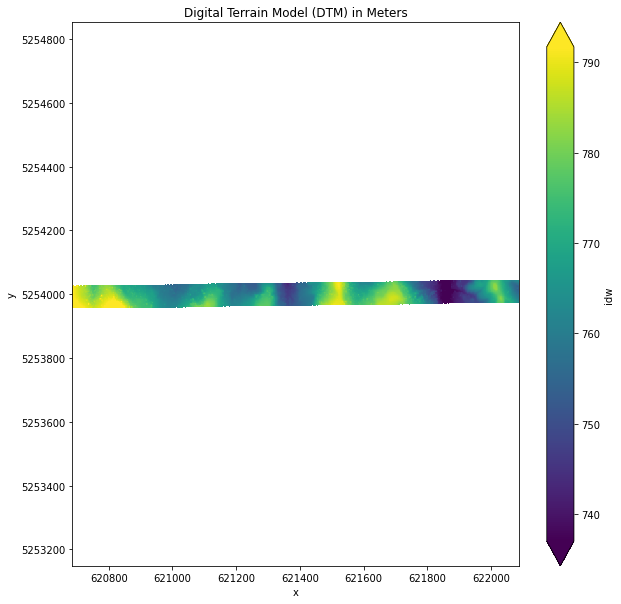

In [116]:
plt.figure(figsize=(10,10))
dtm.plot(cmap="viridis", robust=True)
plt.title("Digital Terrain Model (DTM) in Meters")
plt.ticklabel_format(style="plain")
plt.axis('equal')

Pretty cool, right? But what if we would like to look at a statistical distribution of the elevation in this region? We can plot a simple histogram, as shown below.

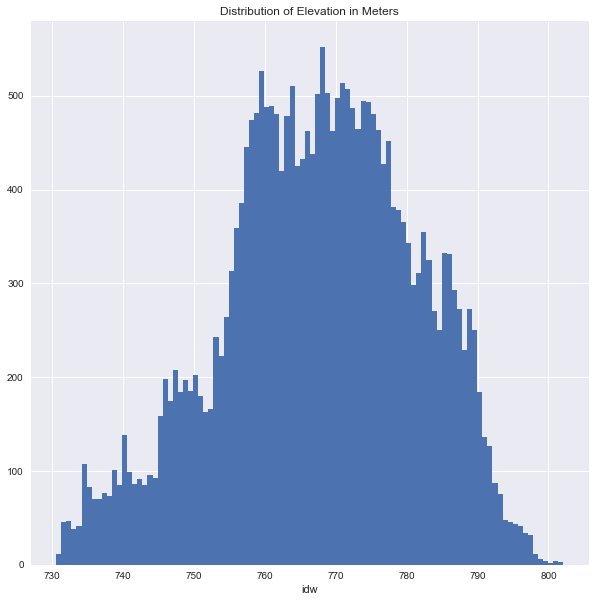

In [117]:
plt.figure(figsize=(10,10))
plt.style.use('seaborn') # prettier plot
dtm.plot.hist(bins=100)
plt.title("Distribution of Elevation in Meters");

## Conclusion
This Jupyter Notebook is designed to make accessing, processing, visualizing, and creating derivative products with 3DEP more straightforward. Specifically, this notebook provides a workflow for programmatically accessing the 3DEP lidar point cloud data using an API request to the cloud-hosted AWS S3 bucket, performing basic processing steps on the point cloud data, and producing digital elevation models (DTMs/DSMs) for a buffered corridor region specified by the user. 

Feedback regarding the workflow, specific use cases, and any computational testing with the notebook are welcomed and encouraged!

## Resources

All OpenTopography USGS 3DEP scientific workflows in this collection:<br>

1. [Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for user-defined area of interest](https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/01_3DEP_Generate_DEM_User_AOI.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/01_3DEP_Generate_DEM_User_AOI.ipynb) <br>

2. [Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for USGS 7.5’ Quadrangles](https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/02_3DEP_Generate_DEM_USGS_7.5_Quadrangles.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/02_3DEP_Generate_DEM_USGS_7.5_Quadrangles.ipynb) <br>

3. [Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for USGS Hydrologic Units](https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/03_3DEP_Generate_DEM_USGS_HUCs.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/03_3DEP_Generate_DEM_USGS_HUCs.ipynb) <br>

4. [Generate and visualize DEMs (DTM and DSM) from USGS 3D Elevation Program (3DEP) lidar data for user-defined corridors](https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/04_3DEP_Generate_DEM_Corridors.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/04_3DEP_Generate_DEM_Corridors.ipynb) <br>

5. [Generate Canopy Height Model (CHM) using USGS 3D Elevation Program (3DEP) lidar data for user-defined area of interest](https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/05_3DEP_Generate_Canopy_Height_Models_User_AOI.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/05_3DEP_Generate_Canopy_Height_Models_User_AOI.ipynb) <br>

6. [Topographic Differencing using USGS 3D Elevation Program (3DEP) lidar data for user-defined area of interest](https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/06_3DEP_Topographic_Differencing.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/06_3DEP_Topographic_Differencing.ipynb) <br>

7. [Generate colorized (RGB) point clouds using USGS 3D Elevation Program (3DEP) lidar data and National Agriculture Imagery Program (NAIP) Imagery](https://github.com/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/07_3DEP_Generate_Colorized_PointClouds.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cmspeed/OT_3DEP_Workflows/blob/main/notebooks/07_3DEP_Generate_Colorized_PointClouds.ipynb)
    
### Additional Resources

- Access USGS 3DEP via the <a href="https://portal.opentopography.org/datasets">OpenTopography</a> portal (Currently restricted to academics).

- The USGS 3DEP Lidar Point Cloud Data are accessible in Entwine Point Tile (EPT) format from this <a href="https://registry.opendata.aws/usgs-lidar/">Amazon Web Services S3 Bucket</a>. <br>

- The USGS hydrologic unit boundaries are accessed via the <a href="https://hydro.nationalmap.gov/arcgis/rest/services/wbd/MapServer">USGS Watershed Dataset Map Service</a>. <br>

- The USGS 7.5' quadrangle boundaries are accessed via the <a href="https://carto.nationalmap.gov/arcgis/rest/services/map_indices/MapServer"> USGS Map Indicies Service</a>. <br>

- Documentation for open-source Python libararies used by these workflows include <a href="https://pdal.dev/en/latest/">PDAL</a> and <a href="https://gdal.org/">GDAL</a>.